In [71]:
import glob
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os

# update the date_folder
folder = "KC_AWS/"
date_folder = "2021/09/01/"
files = "*.csv"

path = r"/Users/vivek/Google Drive/Dravam_Vivek/Data/KC_AWS/*.csv"
path = r"/Users/jufri/Google Drive/Dravam/TS_datavis/KC_AWS/*.csv"
path = r"/Users/jufri/Google Drive/Dravam/TS_datavis/KC_AWS/2021/09/05/*.csv"
path = folder+date_folder+files

header_list = [
   "time", "date_year", "date_month", "date_day", 
   "time_hr", "time_min", "time_sec", "time_Msec", 
   "pt_0001_load_value", "tt_0001_load_value", # pressure, temp
   "dp_0001_load_value", "dp_0001_unload_value", # diff pressure low 0-2000, high 0-5000
   "dp_0002_load_value", "dp_0002_unload_value",
   ]

variable_list=[
   "pt_0001_load_value", "tt_0001_load_value", 
   "dp_0001_load_value", "dp_0001_unload_value",
   "dp_0002_load_value", "dp_0002_unload_value"
]

# for fname in glob.glob(path):
#    print(fname)
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# print(all_filenames)

all_filenames = [i for i in glob.glob(path)]
all_filenames = sorted(all_filenames)
all_filenames = all_filenames[:]
# for fname in glob.glob(path):
#    print(fname)

# #combine all files in the list
df_day_combined = pd.concat([pd.read_csv(f, names=header_list) for f in all_filenames ])


In [72]:
df_day_combined.shape

(864001, 14)

In [2]:
df_day_combined=df_day_combined[["time"]+variable_list]

In [3]:
df_day_combined['time'] = pd.to_datetime(df_day_combined['time'], format='%Y-%m-%d %H:%M:%S.%f')
df_day_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864001 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   time                  864001 non-null  datetime64[ns]
 1   pt_0001_load_value    864001 non-null  float64       
 2   tt_0001_load_value    864001 non-null  float64       
 3   dp_0001_load_value    864001 non-null  float64       
 4   dp_0001_unload_value  864001 non-null  float64       
 5   dp_0002_load_value    864001 non-null  float64       
 6   dp_0002_unload_value  864001 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 52.7 MB


<AxesSubplot:xlabel='time'>

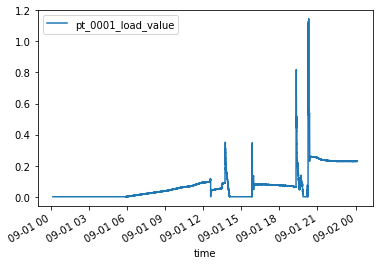

In [5]:
df_day_combined.plot(x="time", y="pt_0001_load_value")

In [8]:
df_day_combined_5 = df_day_combined.iloc[::5]
df_day_combined_2 = df_day_combined.iloc[::2]

<AxesSubplot:xlabel='time'>

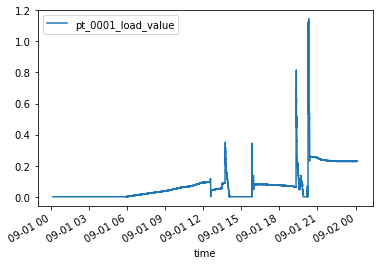

In [9]:
df_day_combined_5.plot(x="time", y="pt_0001_load_value")

<AxesSubplot:xlabel='time'>

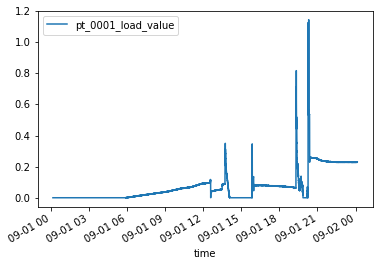

In [10]:
df_day_combined_2.plot(x="time", y="pt_0001_load_value")

<AxesSubplot:xlabel='time'>

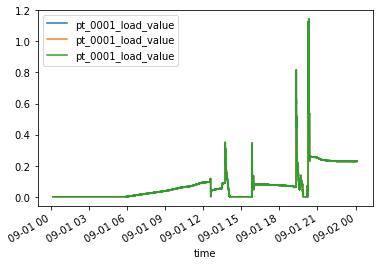

In [13]:
ax = df_day_combined.plot(x="time", y="pt_0001_load_value")
df_day_combined_2.plot(ax=ax,x="time", y="pt_0001_load_value")
df_day_combined_5.plot(ax=ax,x="time", y="pt_0001_load_value")


In [18]:
df_day_combined.describe()

pt_0001_load_value  tt_0001_load_value  dp_0001_load_value  \
count       864001.000000       864001.000000       864001.000000   
mean             0.071414           31.215907           29.723951   
std              0.092275            3.415989           88.666396   
min              0.000000           27.381250            0.000000   
25%              0.000000           27.931250            0.000000   
50%              0.046250           30.049999            0.000000   
75%              0.080000           34.568748            0.000000   
max              1.146250           37.687500         1609.000000   

       dp_0001_unload_value  dp_0002_load_value  dp_0002_unload_value  
count         864001.000000       864001.000000         864001.000000  
mean              23.489627           15.220324              1.760199  
std               28.628446           40.870688             11.303955  
min                0.000000            0.000000              0.000000  
25%                8.125000            0.000000              0.000000  
50%               22.625000            0.000000              0.000000  
75%               33.375000            5.312500              0.000000  
max             1536.250000         1797.812500            785.312500

In [33]:
df_day_combined_2.describe().loc[["std"]]

pt_0001_load_value  tt_0001_load_value  dp_0001_load_value  \
std            0.092275            3.415986           88.657859   

     dp_0001_unload_value  dp_0002_load_value  dp_0002_unload_value  
std              28.62626           40.867253             11.306296

In [29]:
pd.concat([df_day_combined_2.describe().loc["std"].to_frame(),df_day_combined_5.describe().loc["std"].to_frame()])

std
pt_0001_load_value     0.092275
tt_0001_load_value     3.415986
dp_0001_load_value    88.657859
dp_0001_unload_value  28.626260
dp_0002_load_value    40.867253
dp_0002_unload_value  11.306296
pt_0001_load_value     0.092274
tt_0001_load_value     3.415992
dp_0001_load_value    88.670028
dp_0001_unload_value  28.647194
dp_0002_load_value    40.864756
dp_0002_unload_value  11.265120

In [48]:
downsample = pd.DataFrame()

In [42]:
print("Shape for all, every 2 count, every 5 count is {},  {},  {} ".format(df_day_combined.shape, df_day_combined_2.shape, df_day_combined_5.shape))
print("Std for all, every 2 count, every 5 count is {:0.5f},  {:0.5f},  {:0.5f} ".format(df_day_combined.pt_0001_load_value.std(), df_day_combined_2.pt_0001_load_value.std(), df_day_combined_5.pt_0001_load_value.std()))
print("Mean for all, every 2 count, every 5 count is {:0.5f},  {:0.5f},  {:0.5f} ".format(df_day_combined.pt_0001_load_value.mean(), df_day_combined_2.pt_0001_load_value.mean(), df_day_combined_5.pt_0001_load_value.mean()))
# print("Std = ", df_day_combined.pt_0001_load_value.mean(), df_day_combined_2.pt_0001_load_value.mean(), df_day_combined_5.pt_0001_load_value.mean())

Shape for all, every 2 count, every 5 count is (864001, 7),  (432001, 7),  (172801, 7) 
Std for all, every 2 count, every 5 count is 0.09228,  0.09228,  0.09227 
Mean for all, every 2 count, every 5 count is 0.07141,  0.07141,  0.07141 


In [70]:
downsample = pd.DataFrame()

std = {'metrics':'std_pt_0001_load_value', 'all':df_day_combined.pt_0001_load_value.std(), 'every2':df_day_combined.pt_0001_load_value.std(), 'every5':df_day_combined_5.pt_0001_load_value.std()}
downsample = downsample.append(std, ignore_index=True)
mean = {'metrics':'mean_pt_0001_load_value', 'all':df_day_combined.pt_0001_load_value.mean(), 'every2':df_day_combined.pt_0001_load_value.mean(), 'every5':df_day_combined_5.pt_0001_load_value.mean()}
downsample = downsample.append(mean, ignore_index=True)

std = {'metrics':'std_tt_0001_load_value', 'all':df_day_combined.tt_0001_load_value.std(), 'every2':df_day_combined.tt_0001_load_value.std(), 'every5':df_day_combined_5.tt_0001_load_value.std()}
downsample = downsample.append(std, ignore_index=True)
mean = {'metrics':'mean_tt_0001_load_value', 'all':df_day_combined.tt_0001_load_value.mean(), 'every2':df_day_combined.tt_0001_load_value.mean(), 'every5':df_day_combined_5.tt_0001_load_value.mean()}
downsample = downsample.append(mean, ignore_index=True)

std = {'metrics':'std_dp_0001_load_value', 'all':df_day_combined.dp_0001_load_value.std(), 'every2':df_day_combined.dp_0001_load_value.std(), 'every5':df_day_combined_5.dp_0001_load_value.std()}
downsample = downsample.append(std, ignore_index=True)
mean = {'metrics':'mean_dp_0001_load_value', 'all':df_day_combined.dp_0001_load_value.mean(), 'every2':df_day_combined.dp_0001_load_value.mean(), 'every5':df_day_combined_5.dp_0001_load_value.mean()}
downsample = downsample.append(mean, ignore_index=True)

std = {'metrics':'std_dp_0001_unload_value', 'all':df_day_combined.dp_0001_unload_value.std(), 'every2':df_day_combined.dp_0001_unload_value.std(), 'every5':df_day_combined_5.dp_0001_unload_value.std()}
downsample = downsample.append(std, ignore_index=True)
mean = {'metrics':'mean_dp_0001_unload_value', 'all':df_day_combined.dp_0001_unload_value.mean(), 'every2':df_day_combined.dp_0001_unload_value.mean(), 'every5':df_day_combined_5.dp_0001_unload_value.mean()}
downsample = downsample.append(mean, ignore_index=True)

std = {'metrics':'std_dp_0002_load_value', 'all':df_day_combined.dp_0002_load_value.std(), 'every2':df_day_combined.dp_0002_load_value.std(), 'every5':df_day_combined_5.dp_0002_load_value.std()}
downsample = downsample.append(std, ignore_index=True)
mean = {'metrics':'mean_dp_0002_load_value', 'all':df_day_combined.dp_0002_load_value.mean(), 'every2':df_day_combined.dp_0002_load_value.mean(), 'every5':df_day_combined_5.dp_0002_load_value.mean()}
downsample = downsample.append(mean, ignore_index=True)

std = {'metrics':'std_dp_0002_unload_value', 'all':df_day_combined.dp_0002_unload_value.std(), 'every2':df_day_combined.dp_0002_unload_value.std(), 'every5':df_day_combined_5.dp_0002_unload_value.std()}
downsample = downsample.append(std, ignore_index=True)
mean = {'metrics':'mean_dp_0002_unload_value', 'all':df_day_combined.dp_0002_unload_value.mean(), 'every2':df_day_combined.dp_0002_unload_value.mean(), 'every5':df_day_combined_5.dp_0002_unload_value.mean()}
downsample = downsample.append(mean, ignore_index=True)

downsample['var']=downsample.var(axis=1)

downsample

all     every2     every5                    metrics           var
0    0.092275   0.092275   0.092274     std_pt_0001_load_value  2.982049e-13
1    0.071414   0.071414   0.071414    mean_pt_0001_load_value  4.978736e-15
2    3.415989   3.415989   3.415992     std_tt_0001_load_value  3.330363e-12
3   31.215907  31.215907  31.215897    mean_tt_0001_load_value  3.197710e-11
4   88.666396  88.666396  88.670028     std_dp_0001_load_value  4.395589e-06
5   29.723951  29.723951  29.726746    mean_dp_0001_load_value  2.602844e-06
6   28.628446  28.628446  28.647194   std_dp_0001_unload_value  1.171654e-04
7   23.489627  23.489627  23.487642  mean_dp_0001_unload_value  1.313843e-06
8   40.870688  40.870688  40.864756     std_dp_0002_load_value  1.172962e-05
9   15.220324  15.220324  15.223496    mean_dp_0002_load_value  3.354002e-06
10  11.303955  11.303955  11.265120   std_dp_0002_unload_value  5.027375e-04
11   1.760199   1.760199   1.757576  mean_dp_0002_unload_value  2.293641e-06